# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [22]:
data

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [167]:
X = np.array(data)
y = X[:,2]
X = X[:,[0,1]]
X
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

### Initialisez theta (combien de dimensions?)

In [168]:
theta = np.array([float(),float(0), float(0)])
theta

array([0., 0., 0.])

### Vérifiez les dimensions de theta et de X. Sont-elles compatibles pour implémenter la fonction d'hypothèse sous forme vectorisée?

In [169]:
x = np.size(X)
x /= 2
ones = np.ones(int(x))
np.shape(ones)
X = np.column_stack((ones.transpose(), X))

### Modifiez X en conséquence

In [170]:
print (np.mean(X[:,1]))
print (X)

2000.6808510638298
[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]
 [1.000e+00 1.985e+03 4.000e+00]
 [1.000e+00 1.534e+03 3.000e+00]
 [1.000e+00 1.427e+03 3.000e+00]
 [1.000e+00 1.380e+03 3.000e+00]
 [1.000e+00 1.494e+03 3.000e+00]
 [1.000e+00 1.940e+03 4.000e+00]
 [1.000e+00 2.000e+03 3.000e+00]
 [1.000e+00 1.890e+03 3.000e+00]
 [1.000e+00 4.478e+03 5.000e+00]
 [1.000e+00 1.268e+03 3.000e+00]
 [1.000e+00 2.300e+03 4.000e+00]
 [1.000e+00 1.320e+03 2.000e+00]
 [1.000e+00 1.236e+03 3.000e+00]
 [1.000e+00 2.609e+03 4.000e+00]
 [1.000e+00 3.031e+03 4.000e+00]
 [1.000e+00 1.767e+03 3.000e+00]
 [1.000e+00 1.888e+03 2.000e+00]
 [1.000e+00 1.604e+03 3.000e+00]
 [1.000e+00 1.962e+03 4.000e+00]
 [1.000e+00 3.890e+03 3.000e+00]
 [1.000e+00 1.100e+03 3.000e+00]
 [1.000e+00 1.458e+03 3.000e+00]
 [1.000e+00 2.526e+03 3.000e+00]
 [1.000e+00 2.200e+03 3.000e+00]
 [1.000e+00 2.637e+03 3.

## Écrivez une fonction pour centrer et réduire les features

In [190]:
def featureScaleNormalize(X):
    print (X)
    mean_x1 = np.mean(X[:,1])
    mean_x2 = np.mean(X[:,2])
    std_x1 = np.std(X[:,1])
    std_x2 = np.std(X[:,2])
    print (X)
    X[:, 1] = X[:, 1] - mean_x1
    X[:, 1] = X[:, 1] / std_x1
    X[:, 2] = X[:, 2] - mean_x2
    X[:, 2] = X[:, 2] / std_x2
    mean = np.array([mean_x1, mean_x2])
    stdev = np.array([std_x1, std_x2])
    return X, mean, stdev

X, mean, stdev = featureScaleNormalize(X)
print(X, mean, stdev)


[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]
 [1.000e+00 1.985e+03 4.000e+00]
 [1.000e+00 1.534e+03 3.000e+00]
 [1.000e+00 1.427e+03 3.000e+00]
 [1.000e+00 1.380e+03 3.000e+00]
 [1.000e+00 1.494e+03 3.000e+00]
 [1.000e+00 1.940e+03 4.000e+00]
 [1.000e+00 2.000e+03 3.000e+00]
 [1.000e+00 1.890e+03 3.000e+00]
 [1.000e+00 4.478e+03 5.000e+00]
 [1.000e+00 1.268e+03 3.000e+00]
 [1.000e+00 2.300e+03 4.000e+00]
 [1.000e+00 1.320e+03 2.000e+00]
 [1.000e+00 1.236e+03 3.000e+00]
 [1.000e+00 2.609e+03 4.000e+00]
 [1.000e+00 3.031e+03 4.000e+00]
 [1.000e+00 1.767e+03 3.000e+00]
 [1.000e+00 1.888e+03 2.000e+00]
 [1.000e+00 1.604e+03 3.000e+00]
 [1.000e+00 1.962e+03 4.000e+00]
 [1.000e+00 3.890e+03 3.000e+00]
 [1.000e+00 1.100e+03 3.000e+00]
 [1.000e+00 1.458e+03 3.000e+00]
 [1.000e+00 2.526e+03 3.000e+00]
 [1.000e+00 2.200e+03 3.000e+00]
 [1.000e+00 2.637e+03 3.000e+00]
 [1.000e+0

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [151]:
def predict(X, theta):
    ret = theta[0] + theta[1] * X[:,1] + theta[2] * X[:,2]
    return (ret)
#print (predict(X, theta))
#print (theta[0] + theta[1] * X[i,1] + theta[2] * X[i, 2] - y[i, 0])
print (theta[0] + theta[1] * X[0, 1] + theta[2] * X[0, 2] - y[0])
for i in range (0, 47):
    print (X[i, 1])
    print (y[i])

-399900.0
2104.0
399900
1600.0
329900
2400.0
369000
1416.0
232000
3000.0
539900
1985.0
299900
1534.0
314900
1427.0
198999
1380.0
212000
1494.0
242500
1940.0
239999
2000.0
347000
1890.0
329999
4478.0
699900
1268.0
259900
2300.0
449900
1320.0
299900
1236.0
199900
2609.0
499998
3031.0
599000
1767.0
252900
1888.0
255000
1604.0
242900
1962.0
259900
3890.0
573900
1100.0
249900
1458.0
464500
2526.0
469000
2200.0
475000
2637.0
299900
1839.0
349900
1000.0
169900
2040.0
314900
3137.0
579900
1811.0
285900
1437.0
249900
1239.0
229900
2132.0
345000
4215.0
549000
2162.0
287000
1664.0
368500
2238.0
329900
2567.0
314000
1200.0
299000
852.0
179900
1852.0
299900
1203.0
239500


In [200]:
def cost(X, y, theta):
    m = X.shape[0]
    ret = np.zeros(int(m))
    for i in range (0, 1):
        ret += (theta[0] + theta[1] * X[i,1] + theta[2] * X[i, 2] - y[i])**2
    return (ret)

##print (cost(X, y, theta))
##print (X * theta)
print (X, theta, y)

[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

In [201]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    
    m = X.shape[0]
    J_history = []
    theta = np.array([float(0), float(0), float(0)])
    for z in range (0, num_iters):
        s0 = float(0)
        s1 = float(0)
        s2 = float(0)
        for i in range (0, int(m)):
            s0 += (theta[0] + theta[1] * X[i, 1] + theta[2] * X[i, 2] - y[i])
            s1 += (theta[0] + theta[1] * X[i, 1] + theta[2] * X[i, 2] - y[i]) * X[i, 1]
            s2 += (theta[0] + theta[1] * X[i, 1] + theta[2] * X[i, 2] - y[i]) * X[i, 2]
        theta[0] = theta[0] - (alpha/m) * s0
        theta[1] = theta[1] - (alpha/m) * s1
        theta[2] = theta[2] - (alpha/m) * s2
        print (theta)
        J_history.append(cost(X, y, theta))
    
    return theta, J_history

theta, J_history = fit_with_cost(X, y, theta, 0.01, 1500)

[3404.12659574 1057.64133493  547.08821756]
[6774.21192553 2101.64274191 1082.78310833]
[10110.59640202  3132.20441912  1607.2749847 ]
[13413.61703375  4149.52349706  2120.75113489]
[16683.60745915  5153.79408617  2623.39587038]
[19920.89798031  6145.20732373  3115.39057257]
[23125.81559625  7123.95141992  3596.91373875]
[26298.68403603  8090.21170335  4068.14102732]
[29439.82379141  9044.17066566  4529.2453023 ]
[32549.55214924  9986.00800564  4980.39667721]
[35628.1832235  10915.90067247  5421.76255814]
[38676.02798701 11834.02290845  5853.50768629]
[41693.39430288 12740.54629095  6275.79417975]
[44680.5869556  13635.63977375  6688.78157463]
[47637.90768179 14519.46972775  7092.6268656 ]
[50565.65520071 15392.19998103  7487.48454579]
[53464.12524445 16253.99185826  7873.50664597]
[56333.61058775 17105.00421956  8250.84277327]
[59174.40107762 17945.39349868  8619.64014916]
[61986.78366259 18775.31374065  8980.04364695]
[64771.04242171 19594.91663882  9332.19582858]
[67527.45859323 204

[328786.63899362  96004.02927356   6343.02302414]
[328902.89919943  96066.11146705   6289.08993268]
[329017.99680318  96127.87484624   6235.34853222]
[329131.9434309   96189.32152585   6181.79869109]
[329244.75059233  96250.45360021   6128.44026712]
[329356.42968215  96311.2731435    6075.27310782]
[329466.99198108  96371.78221002   6022.29705061]
[329576.44865701  96431.98283441   5969.51192305]
[329684.81076618  96491.87703197   5916.91754302]
[329792.08925427  96551.46679883   5864.51371892]
[329898.29495747  96610.75411225   5812.30024991]
[330003.43860364  96669.74093084   5760.27692607]
[330107.53081335  96728.42919479   5708.44352864]
[330210.58210096  96786.82082613   5656.79983015]
[330312.60287569  96844.91772894   5605.34559466]
[330413.60344268  96902.72178956   5554.08057792]
[330513.594004    96960.23487685   5503.00452757]
[330612.5846597   97017.4588424    5452.11718329]
[330710.58540885  97074.39552074   5401.41827702]
[330807.60615051  97131.04672954   5350.90753308]


[339912.34057378 106130.57327615  -3264.94014304]
[339917.34376379 106145.19147236  -3279.49892817]
[339922.2969219  106159.74501103  -3293.99398256]
[339927.20054842 106174.23418186  -3308.42558144]
[339932.05513868 106188.65927321  -3322.79399895]
[339936.86118304 106203.02057207  -3337.09950805]
[339941.61916695 106217.31836409  -3351.34238063]
[339946.32957103 106231.55293362  -3365.52288743]
[339950.99287106 106245.72456363  -3379.64129809]
[339955.6095381  106259.83353582  -3393.69788112]
[339960.18003846 106273.88013054  -3407.69290393]
[339964.70483382 106287.86462685  -3421.62663284]
[339969.18438123 106301.78730251  -3435.49933306]
[339973.61913316 106315.64843398  -3449.31126869]
[339978.00953757 106329.44829645  -3463.06270275]
[339982.35603794 106343.18716381  -3476.75389718]
[339986.65907331 106356.8653087   -3490.38511281]
[339990.91907832 106370.48300248  -3503.95660941]
[339995.13648328 106384.04051525  -3517.46864567]
[339999.31171419 106397.53811587  -3530.92147919]


[340386.06923885 108533.09370702  -5663.6907196 ]
[340386.33514221 108537.11891546  -5667.71532546]
[340386.59838653 108541.1264083   -5671.7222251 ]
[340386.85899841 108545.11626352  -5675.7114964 ]
[340387.11700417 108549.08855881  -5679.68321686]
[340387.37242987 108553.04337147  -5683.63746367]
[340387.62530132 108556.9807785   -5687.57431367]
[340387.87564405 108560.90085652  -5691.49384335]
[340388.12348335 108564.80368184  -5695.39612889]
[340388.36884426 108568.68933043  -5699.28124611]
[340388.61175157 108572.55787792  -5703.14927052]
[340388.8522298  108576.40939959  -5707.00027729]
[340389.09030324 108580.24397043  -5710.83434124]
[340389.32599595 108584.06166506  -5714.65153689]
[340389.55933174 108587.86255779  -5718.45193843]
[340389.79033417 108591.64672259  -5722.2356197 ]
[340390.01902657 108595.41423311  -5726.00265424]
[340390.24543205 108599.16516269  -5729.75311526]
[340390.46957347 108602.89958433  -5733.48707564]
[340390.69147348 108606.6175707   -5737.20460796]


[340411.0491398  109180.54812009  -6311.10698526]
[340411.06524414 109181.72410317  -6312.28296083]
[340411.08118745 109182.89491149  -6313.45376177]
[340411.09697132 109184.06056783  -6314.61941085]
[340411.11259735 109185.22109486  -6315.77993073]
[340411.12806712 109186.37651515  -6316.93534397]
[340411.14338219 109187.52685117  -6318.08567307]
[340411.15854412 109188.6721253   -6319.23094037]
[340411.17355442 109189.81235981  -6320.37116816]
[340411.18841462 109190.94757687  -6321.50637861]
[340411.20312622 109192.07779857  -6322.63659381]
[340411.2176907  109193.20304689  -6323.76183572]
[340411.23210954 109194.32334371  -6324.88212623]
[340411.24638419 109195.43871082  -6325.99748713]
[340411.26051609 109196.54916992  -6327.10794011]
[340411.27450668 109197.65474259  -6328.21350677]
[340411.28835735 109198.75545035  -6329.31420861]
[340411.30206952 109199.85131461  -6330.41006703]
[340411.31564457 109200.94235666  -6331.50110335]
[340411.32908387 109202.02859775  -6332.58733879]


## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

## Visualisez l'évolution du coût (graphe de convergence)

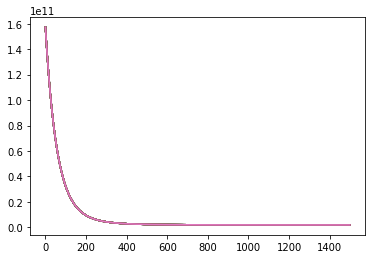

In [202]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [2]:
print (predict(int(1650), theta))

NameError: name 'predict' is not defined

### Réécrivez votre fonction fit pour qu'elle prenne en compte un parametre de regularisation (L1, L2 pour Lasso ou Ridge) et adapte la mise  a jour de theta an fonction de la regularization précisée

In [ ]:
def fit_with_regularization(X, y, theta, alpha, num_iters, regularization=""):
    
    
    
    
    return theta, J_history

### La fonction fit au complet. Ajoutez un dernier parametre qui précise le gradient employé (stochastic, mini_batch(avec le batch_size), batch). Pour la descente de gradient stochastic et minibatch on met a jour le learning rate avec la formule du learning rate decay

In [ ]:
def complete_fit(X, y, theta, alpha, num_iters, regularization="", gradient_descent="batch", batch_size=4, decay_rate=1):
    
    
    
    
    return theta, J_history